In [11]:
from numpy import unique, argmax
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow. keras. layers import Conv2D
from tensorflow.keras . layers import MaxPool2D
from tensorflow.keras. layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow. keras.layers import Dropout
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np

In [12]:
#split dataset into train and test
(x_train, y_train), (x_test, y_test) = load_data ()
#reshaping the training and testing data
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1],
x_train.shape[2], 1))
x_test = x_test. reshape( (x_test. shape[0], x_test. shape [1], x_test.shape[2], 1))

In [13]:
#normalizing the values of pixels of images
x_train = x_train.astype( 'float32') / 255.0
x_test = x_test.astype('float32') / 255.0

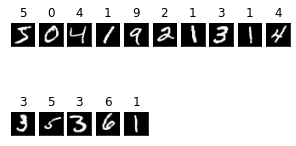

In [14]:
fig = plt.figure (figsize= (5, 3))
for i in range(15):
    ax = fig.add_subplot(2,10, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]), cmap='gray')
    ax.set_title(y_train[i])

In [15]:
# defining the model
model = Sequential()
model.add(Conv2D(32, kernel_size=3, activation = 'relu', input_shape=(28,28,1)))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(48,(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(10,activation='softmax'))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 48)        13872     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 48)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 48)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1200)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)              

In [17]:
model.compile(optimizer= 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
x= model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=2, validation_split=0.1)

Epoch 1/10
422/422 - 30s - loss: 0.2336 - accuracy: 0.9305 - val_loss: 0.0661 - val_accuracy: 0.9795
Epoch 2/10
422/422 - 27s - loss: 0.0785 - accuracy: 0.9750 - val_loss: 0.0426 - val_accuracy: 0.9878
Epoch 3/10
422/422 - 28s - loss: 0.0590 - accuracy: 0.9814 - val_loss: 0.0383 - val_accuracy: 0.9902
Epoch 4/10
422/422 - 31s - loss: 0.0482 - accuracy: 0.9845 - val_loss: 0.0347 - val_accuracy: 0.9907
Epoch 5/10
422/422 - 29s - loss: 0.0412 - accuracy: 0.9872 - val_loss: 0.0299 - val_accuracy: 0.9910
Epoch 6/10
422/422 - 26s - loss: 0.0366 - accuracy: 0.9879 - val_loss: 0.0277 - val_accuracy: 0.9918
Epoch 7/10
422/422 - 25s - loss: 0.0314 - accuracy: 0.9899 - val_loss: 0.0316 - val_accuracy: 0.9920
Epoch 8/10
422/422 - 26s - loss: 0.0300 - accuracy: 0.9902 - val_loss: 0.0250 - val_accuracy: 0.9935
Epoch 9/10
422/422 - 26s - loss: 0.0254 - accuracy: 0.9920 - val_loss: 0.0276 - val_accuracy: 0.9927
Epoch 10/10
422/422 - 27s - loss: 0.0234 - accuracy: 0.9919 - val_loss: 0.0274 - val_accura

In [18]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Accuracy: {accuracy*100}')

Accuracy: 99.18000102043152


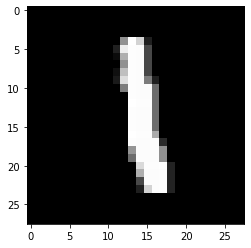

In [19]:
image = x_train[6]
plt.imshow(np.squeeze(image), cmap='gray') 
plt.show()

In [20]:
image = image.reshape(1,image.shape[0],image.shape[1],image.shape[2])
p = model.predict([image])
print('predicted: {}'.format(argmax(p)))

predicted: 1
